In [1]:
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os

In [2]:
file_path = os.path.abspath("Full_Data_Bankruptcy.csv")
df_prime = pd.read_csv(file_path)

#BASIC CLEANING

df_prime=df_prime.drop(' Net Income Flag',axis=1)
df_prime=df_prime.drop(' Liability-Assets Flag',axis=1)
print(df_prime.shape)
print(df_prime.isnull().sum())
#df_prime.info()

(6819, 94)
Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Net Income to Stockholder's Equity                         0
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Equity to Liability                                        0
Length: 94, dtype: int64


0    6599
1     220
Name: Bankrupt?, dtype: int64


Text(0.5, 1.0, 'Target feature - Bankrupt?')

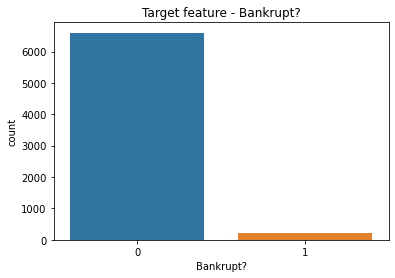

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


print(df_prime['Bankrupt?'].value_counts())
sns.countplot(x=df_prime['Bankrupt?'])
plt.title('Target feature - Bankrupt?')

# OVERSAMPLING THE DATA

0    3599
1    1100
Name: Bankrupt?, dtype: int64


Text(0.5, 1.0, 'Target feature - Bankrupt?')

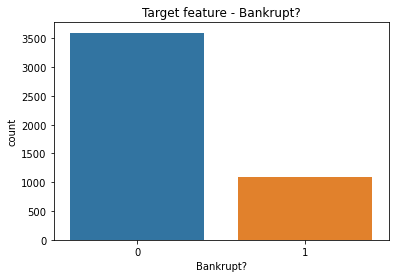

In [4]:

# Split DataFrame by bankruptcy
grouped = df_prime.groupby(df_prime['Bankrupt?'] == 1)

# Get subsets
Bankrutcy = grouped.get_group(True)
NoBankrutcy = grouped.get_group(False)


#NoBankrutcy['Bankrupt?'].value_counts()



#UNDERsampling the X data by substracting some data from the table
# Generate random indices
indices = np.random.choice(NoBankrutcy.index, size=3000, replace=False)
# Remove rows at random
NoBankrutcy = NoBankrutcy.drop(indices)



#OVERSAMPLING Y data
Bankrutcy_new = pd.DataFrame(np.repeat(Bankrutcy.values, 5, axis=0))
Bankrutcy_new.columns = Bankrutcy.columns
Bankrutcy_new['Bankrupt?'] = Bankrutcy_new['Bankrupt?'].astype(int)


#RESET INDEXES BEFORE TO MERGE BOTH DF
NoBankrutcy = NoBankrutcy.reset_index(drop=True)
Bankrutcy = Bankrutcy.reset_index(drop=True)

frames = [NoBankrutcy, Bankrutcy_new]

df = pd.concat(frames)
#SHUFFLE THE ROWS
df = df.sample(frac = 1)
print(df['Bankrupt?'].value_counts())

#plotting the DF frame
sns.countplot(x=df['Bankrupt?'])
plt.title('Target feature - Bankrupt?')

In [112]:
df.to_csv(index=False)
df.to_csv(r'./Balanced_Bankruptcy.csv', index=False)
